# Predict Employee Turnover

## Introduction

Employee turnover, also known as employee attrition, is a critical challenge faced by organizations across industries. It refers to the rate at which employees leave a company and need to be replaced. High turnover can significantly impact a company's productivity, morale, and ultimately, its bottom line. Predicting employee turnover can help organizations proactively identify at-risk employees and take necessary actions to retain them.

In this project, we will leverage data science techniques and Python programming to build a predictive model for employee turnover. The dataset used for this analysis, named [HR_employee_data](https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics?resource=download), was obtained from Kaggle and contains various features related to employees such as satisfaction level, number of projects, average monthly hours worked, time spent at the company, and whether they have had a work accident, among others.

By analyzing this dataset and applying machine learning algorithms, we aim to develop a model that can accurately predict which employees are likely to leave the company. This predictive capability can enable HR departments and organizational leaders to implement targeted retention strategies, improve employee satisfaction, and reduce turnover rates.

Through this project, we will demonstrate the power of data-driven insights in addressing complex business challenges and empowering organizations to make informed decisions to retain top talent and foster a productive work environment.


# Exploratory Data Analysis (EDA)

## Import Libraries and Load Data

Let's start by importing the necessary libraries for data analysis and visualization. We will also load the HR_employee_data dataset into a DataFrame.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('HR_Employee_Data.xlsx')

# Display the first few rows of the dataset
df.head()


,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


## Dataset Overview
Let's examine the basic information about the dataset, such as the number of rows and columns, data types, and any missing values.

In [4]:
df.shape

(14999, 11)

In [5]:
df.dtypes

Emp_Id                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
df.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Statistical Summary
Let's calculate and display the statistical summary of numerical columns in the dataset to understand the central tendencies and distributions.

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Visualization
Next, we'll create visualizations to better understand the distribution of key features and their relationships.

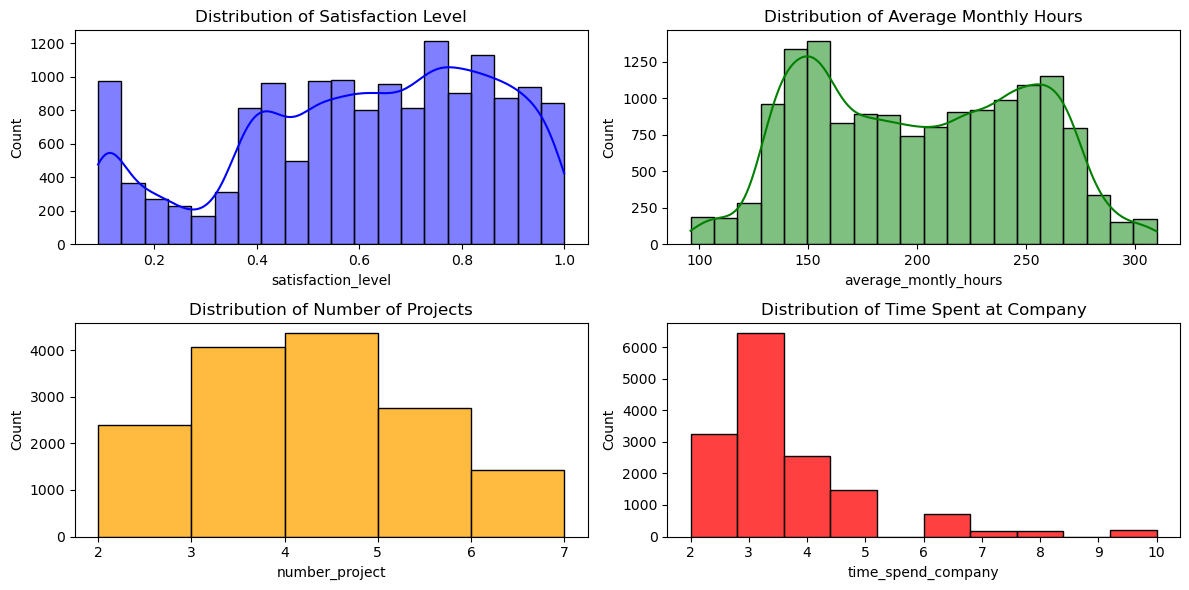

In [9]:
# Plot histograms for selected numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['satisfaction_level'], bins=20, kde=True, color='blue')
plt.title('Distribution of Satisfaction Level')

plt.subplot(2, 2, 2)
sns.histplot(df['average_montly_hours'], bins=20, kde=True, color='green')
plt.title('Distribution of Average Monthly Hours')

plt.subplot(2, 2, 3)
sns.histplot(df['number_project'], bins=5, kde=False, color='orange')
plt.title('Distribution of Number of Projects')

plt.subplot(2, 2, 4)
sns.histplot(df['time_spend_company'], bins=10, kde=False, color='red')
plt.title('Distribution of Time Spent at Company')

plt.tight_layout()
plt.show()

## Correlation Heatmap

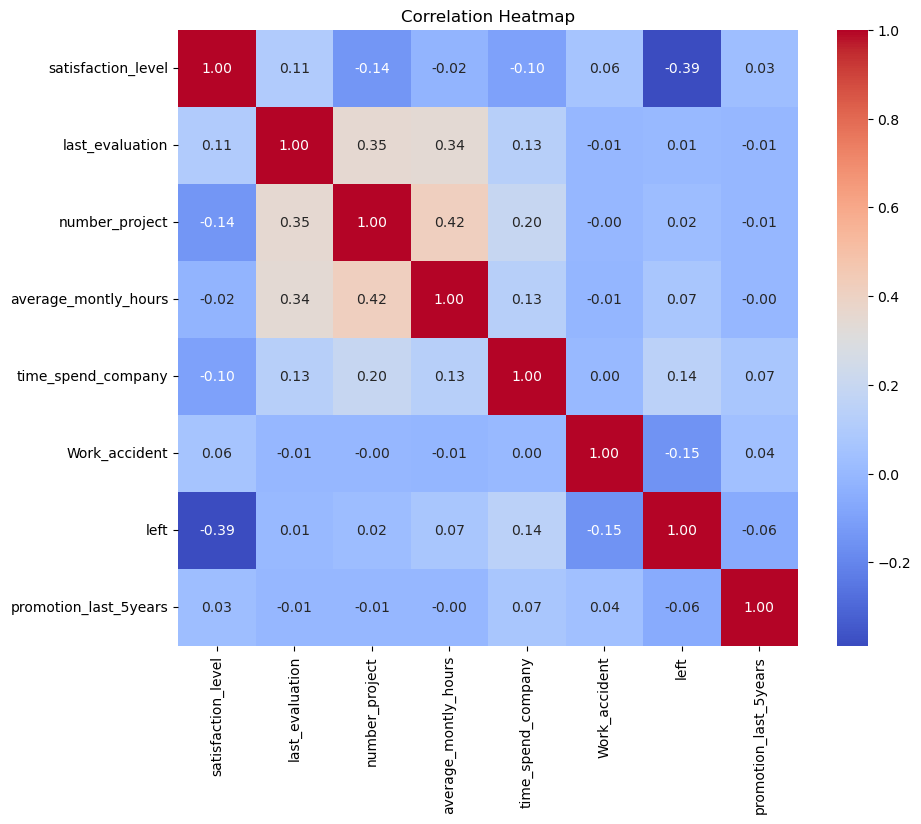

In [11]:
# Calculate and plot the correlation heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Implementation Steps

## Identify Target Churn Label and Features

Let's identify the target churn label and features for our analysis.

In [19]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Extract features and target label into separate DataFrames
X = df.drop("left",axis=1)
y = df['left']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Department'] = label_encoder.fit_transform(X['Department'])
X['salary'] = label_encoder.fit_transform(X['salary'])

/var/folders/1z/nmmq24w53tlgbtppw_7dwbqw0000gp/T/ipykernel_3306/450731764.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Department'] = label_encoder.fit_transform(X['Department'])
/var/folders/1z/nmmq24w53tlgbtppw_7dwbqw0000gp/T/ipykernel_3306/450731764.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['salary'] = label_encoder.fit_transform(X['salary'])


## Explore Correlations of Features to Churn
Let's explore the correlations of features with the churn label to understand their relationships.


In [20]:
# Calculate correlations between features and target label
correlations = df[features + [target_label]].corr()

# Display correlations with churn label
print("Correlations with Churn Label:")
print(correlations[target_label].sort_values(ascending=False))

Correlations with Churn Label:
left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


/var/folders/1z/nmmq24w53tlgbtppw_7dwbqw0000gp/T/ipykernel_3306/3039415665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df[features + [target_label]].corr()


## Split into Train and Test Sets
Split the data into training and testing sets for model training and evaluation.

In [21]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Baseline Logistic Regression Model
Train a baseline Logistic Regression model using scikit-learn.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.7990


/Users/HaniesAir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
